In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

## Tratamento

In [43]:
csv = pd.read_csv('/content/precos-gasolina-etanol-07.csv', delimiter=';')
comb_jul = pd.DataFrame(csv)
comb_jul.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


In [44]:
csv = pd.read_csv('/content/precos-gasolina-etanol-08.csv', delimiter=';')
comb_ago = pd.DataFrame(csv)
comb_ago.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA


In [45]:
conjunto_dados = pd.concat([comb_jul, comb_ago])
conjunto_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


In [46]:
conjunto_dados.reset_index(0,drop=True,inplace=True)

In [47]:
((conjunto_dados.isnull().sum() / conjunto_dados.shape[0]) * 100).sort_values(ascending=False)

Valor de Compra      100.000000
Complemento           78.707461
Bairro                 0.323960
Numero Rua             0.055828
Regiao - Sigla         0.000000
Estado - Sigla         0.000000
Municipio              0.000000
Revenda                0.000000
CNPJ da Revenda        0.000000
Nome da Rua            0.000000
Cep                    0.000000
Produto                0.000000
Data da Coleta         0.000000
Valor de Venda         0.000000
Unidade de Medida      0.000000
Bandeira               0.000000
dtype: float64

In [48]:
conjunto_dados.drop('Valor de Compra', axis=1, inplace=True)

In [49]:
conjunto_dados['Valor de Venda'] = conjunto_dados['Valor de Venda'].apply(lambda y: float(str(y.replace(',','.'))))

In [50]:
conjunto_dados.Complemento.fillna('0', inplace=True)

In [51]:
conjunto_dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,0,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,0,LACE,29703-030,GASOLINA,01/07/2022,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,5.99,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,7.39,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,6.49,R$ / litro,IPIRANGA


In [52]:
conjunto_dados['Data da Coleta'] = pd.to_datetime(conjunto_dados['Data da Coleta'],format='%d/%m/%Y')
conjunto_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,0,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA


In [53]:
conjunto_dados.loc[(conjunto_dados['Data da Coleta'] > '2022-07-11') & (conjunto_dados['Data da Coleta'] < '2022-07-15')]

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
18585,S,RS,PORTO ALEGRE,COMERCIAL DE COMBUSTIVEIS TK LTDA,91.438.796/0001-14,RUA EDUARDO PRADO,415,CAVALHADA,CAVALHADA,91751-000,GASOLINA ADITIVADA,2022-07-12,6.09,R$ / litro,RAIZEN
18586,S,RS,PORTO ALEGRE,COMERCIAL DE COMBUSTIVEIS TK LTDA,91.438.796/0001-14,RUA EDUARDO PRADO,415,CAVALHADA,CAVALHADA,91751-000,GASOLINA,2022-07-12,5.89,R$ / litro,RAIZEN
18587,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA ADITIVADA,2022-07-12,6.39,R$ / litro,VIBRA ENERGIA
18588,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,ETANOL,2022-07-12,5.59,R$ / litro,VIBRA ENERGIA
18589,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA,2022-07-12,6.39,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28444,NE,BA,IRECE,AUTO POSTO NORDESTE LTDA,35.621.319/0001-19,RUA BELEM,S/N,TERREO,BAIXAO DE SINEZIA,44900-000,GASOLINA ADITIVADA,2022-07-14,6.19,R$ / litro,BRANCA
28445,NE,PE,RECIFE,HCW COMERCIO DE COMBUSTIVEIS E LUBRIFICANTES LTDA,33.172.272/0003-90,RUA GENERAL JOAQUIM INACIO,425,0,PAISSANDU,50070-495,GASOLINA,2022-07-14,6.35,R$ / litro,IPIRANGA
28446,NE,PE,RECIFE,HCW COMERCIO DE COMBUSTIVEIS E LUBRIFICANTES LTDA,33.172.272/0003-90,RUA GENERAL JOAQUIM INACIO,425,0,PAISSANDU,50070-495,ETANOL,2022-07-14,5.79,R$ / litro,IPIRANGA
28447,S,SC,FLORIANOPOLIS,VIP COMBUSTIVEIS LTDA,35.793.154/0001-62,RUA WALDEMAR OURIQUES,739,0,CAPOEIRAS,88090-050,GASOLINA,2022-07-14,5.96,R$ / litro,BRANCA


In [54]:
conjunto_dados.dtypes

Regiao - Sigla               object
Estado - Sigla               object
Municipio                    object
Revenda                      object
CNPJ da Revenda              object
Nome da Rua                  object
Numero Rua                   object
Complemento                  object
Bairro                       object
Cep                          object
Produto                      object
Data da Coleta       datetime64[ns]
Valor de Venda              float64
Unidade de Medida            object
Bandeira                     object
dtype: object

In [55]:
#conjunto_dados['Data da Coleta'] = conjunto_dados['Data da Coleta'].dt.strftime('%d-%m-%Y')
#conjunto_dados.head(1)

In [56]:
conjunto_dados['Data da Coleta'][0]

Timestamp('2022-07-01 00:00:00')

## Trabalhando nos dados

### 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

     Há uma correlação positiva muito forte entre os valores do combustível com base na média por região.

In [57]:
media_combustivel_regiao = conjunto_dados.groupby(['Regiao - Sigla','Produto'])[['Valor de Venda']].mean()

media_combustivel_regiao

Valor de Venda
Regiao - Sigla Produto                           
CO             ETANOL                    4.107305
               GASOLINA                  5.581603
               GASOLINA ADITIVADA        5.721266
N              ETANOL                    5.340633
               GASOLINA                  5.972082
               GASOLINA ADITIVADA        6.105695
NE             ETANOL                    5.246069
               GASOLINA                  5.955809
               GASOLINA ADITIVADA        6.109450
S              ETANOL                    4.842372
               GASOLINA                  5.641161
               GASOLINA ADITIVADA        5.777628
SE             ETANOL                    4.149964
               GASOLINA                  5.615655
               GASOLINA ADITIVADA        5.827207

In [58]:
media_regiao1 = media_combustivel_regiao.unstack()
media_regiao1

Valor de Venda                             
Produto                ETANOL  GASOLINA GASOLINA ADITIVADA
Regiao - Sigla                                            
CO                   4.107305  5.581603           5.721266
N                    5.340633  5.972082           6.105695
NE                   5.246069  5.955809           6.109450
S                    4.842372  5.641161           5.777628
SE                   4.149964  5.615655           5.827207

In [59]:
correlacao1 = media_regiao1.corr()
correlacao1

Valor de Venda                             
Produto                                   ETANOL  GASOLINA GASOLINA ADITIVADA
               Produto                                                       
Valor de Venda ETANOL                   1.000000  0.907887           0.856241
               GASOLINA                 0.907887  1.000000           0.986119
               GASOLINA ADITIVADA       0.856241  0.986119           1.000000

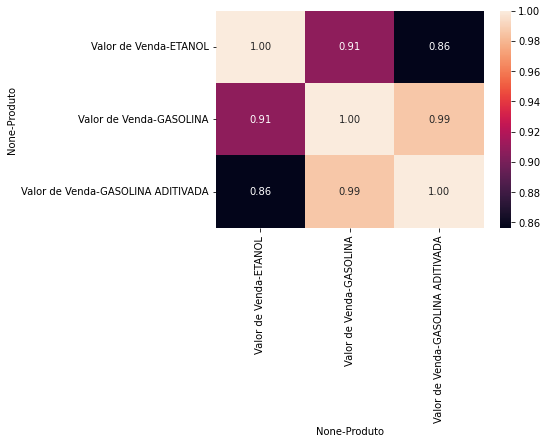

In [60]:
matriz1 = sns.heatmap(correlacao1, annot = True, fmt=".2f")

In [61]:
media_regiao2 = media_combustivel_regiao.unstack('Regiao - Sigla', 'Produto')
media_regiao2

Valor de Venda                                        
Regiao - Sigla                 CO         N        NE         S        SE
Produto                                                                  
ETANOL                   4.107305  5.340633  5.246069  4.842372  4.149964
GASOLINA                 5.581603  5.972082  5.955809  5.641161  5.615655
GASOLINA ADITIVADA       5.721266  6.105695  6.109450  5.777628  5.827207

In [62]:
correlacao2 = media_regiao2.corr()
correlacao2

Valor de Venda                                \
Regiao - Sigla                            CO         N        NE         S   
               Regiao - Sigla                                                
Valor de Venda CO                   1.000000  0.996300  0.996006  0.998359   
               N                    0.996300  1.000000  0.999994  0.999587   
               NE                   0.996006  0.999994  1.000000  0.999485   
               S                    0.998359  0.999587  0.999485  1.000000   
               SE                   0.999282  0.998840  0.998673  0.999812   

                                         
Regiao - Sigla                       SE  
               Regiao - Sigla            
Valor de Venda CO              0.999282  
               N               0.998840  
               NE              0.998673  
               S               0.999812  
               SE              1.000000

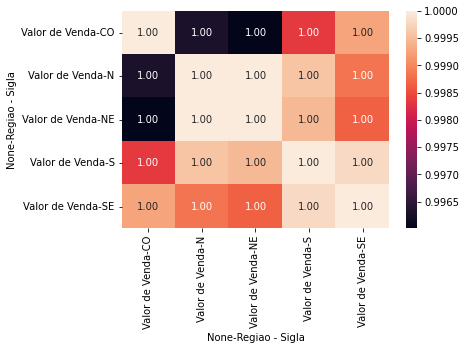

In [63]:
matriz2 = sns.heatmap(correlacao2, annot = True, fmt=".2f")

10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [64]:
media_combustivel_bandeira = conjunto_dados.groupby(['Bandeira', 'Produto'])[['Valor de Venda']].mean()

media_combustivel_bandeira

Valor de Venda
Bandeira    Produto                           
ALESAT      ETANOL                    4.657715
            GASOLINA                  5.798276
            GASOLINA ADITIVADA        5.925192
AMERICANOIL ETANOL                    5.190000
            GASOLINA                  5.847826
...                                        ...
WALENDOWSKY GASOLINA                  5.852222
            GASOLINA ADITIVADA        5.862222
WATT        ETANOL                    4.104545
            GASOLINA                  6.027273
            GASOLINA ADITIVADA        6.960000

[145 rows x 1 columns]

In [65]:
media_bandeira1 = media_combustivel_bandeira.unstack()
media_bandeira1

Valor de Venda                             
Produto                      ETANOL  GASOLINA GASOLINA ADITIVADA
Bandeira                                                        
ALESAT                     4.657715  5.798276           5.925192
AMERICANOIL                5.190000  5.847826           5.915333
ATEM' S                    5.158268  5.974562           5.916859
ATLÂNTICA                  4.942308  5.791750           5.837419
BRANCA                     4.373859  5.645761           5.762779
CHARRUA                    5.855185  5.613253           5.749277
CIAPETRO                   4.248539  5.620118           5.722264
DIBRAPE                    4.880769  5.707667           5.741034
DISLUB                     5.331754  5.909265           6.146610
EQUADOR                    5.229881  6.077594           6.101371
ESTRADA                    4.650000  6.465000           6.515000
FAN                        5.452143  6.086579           6.178824
FEDERAL ENERGIA            4.908333  5.774167           5.826364
IDAZA                      4.064225  5.759041           5.843962
IPIRANGA                   4.460437  5.713057           5.923283
LARCO                      4.921500  5.892500           5.892500
MASUT DISTRIBUIDORA        4.230000  5.590400           5.544375
MAXSUL                     5.989474  5.788667           5.791698
MONTEPETRO                 4.155882  5.652353           5.652353
PELIKANO                   4.724286  5.727143           5.727143
PETROBAHIA                 5.320233  6.205116           6.193125
PETRONAC                   5.690000  6.390000           6.490000
PETROSERRA                 5.049524  6.056190           6.083077
PETROX DISTRIBUIDORA       4.961892  5.576933           5.578485
POTENCIAL                  4.518077  5.689130           5.832195
RAIZEN                     4.469236  5.712784           5.960713
RAIZEN MIME                5.221822  5.726522           5.894636
REJAILE                    5.556667  5.931250           6.026250
RIO BRANCO                 4.245893  5.666429           5.704706
RODOIL                     4.997739  5.658024           5.774597
ROYAL FIC                  4.285455  5.331818           5.331818
RUFF C.J.                  3.903333  5.383333                NaN
RZD DISTRIBUIDORA          4.910000  5.934444           5.934444
SABBÁ                      5.294936  5.908065           6.121400
SETTA DISTRIBUIDORA        5.166957  5.777826           5.905385
SIMARELLI                  4.318400  5.947907           5.998056
SMALL                      4.476000  5.581000           5.618500
SP                         5.538000  6.062000           6.124062
STANG                      4.688352  5.579802           5.577347
SUL COMBUSTÍVEIS                NaN  5.701500           5.851500
TAURUS                     4.436805  5.563030           5.906327
TDC DISTRIBUIDORA          5.170000  5.860278           5.884571
TEMAPE                     5.450323  5.957500           6.004194
TORRAO                     4.088462  5.497692           5.517273
TOTALENERGIES              4.357200  5.753194           5.959615
UNI                        4.578750  5.528750           5.602500
VIBRA ENERGIA              4.685099  5.786363           5.955850
WALENDOWSKY                5.045556  5.852222           5.862222
WATT                       4.104545  6.027273           6.960000

In [66]:
correlacao3 = media_bandeira1.corr()
correlacao3

Valor de Venda                             
Produto                                   ETANOL  GASOLINA GASOLINA ADITIVADA
               Produto                                                       
Valor de Venda ETANOL                   1.000000  0.501727           0.261135
               GASOLINA                 0.501727  1.000000           0.840504
               GASOLINA ADITIVADA       0.261135  0.840504           1.000000

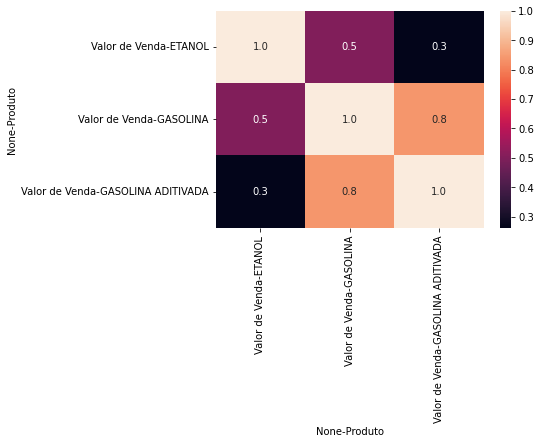

In [67]:
matriz3 = sns.heatmap(correlacao3, annot = True, fmt=".1f")

In [68]:
media_bandeira2 = media_combustivel_bandeira.unstack('Bandeira')
media_bandeira2

Valor de Venda                                            \
Bandeira                   ALESAT AMERICANOIL   ATEM' S ATLÂNTICA    BRANCA   
Produto                                                                       
ETANOL                   4.657715    5.190000  5.158268  4.942308  4.373859   
GASOLINA                 5.798276    5.847826  5.974562  5.791750  5.645761   
GASOLINA ADITIVADA       5.925192    5.915333  5.916859  5.837419  5.762779   

                                                                      ...  \
Bandeira             CHARRUA  CIAPETRO   DIBRAPE    DISLUB   EQUADOR  ...   
Produto                                                               ...   
ETANOL              5.855185  4.248539  4.880769  5.331754  5.229881  ...   
GASOLINA            5.613253  5.620118  5.707667  5.909265  6.077594  ...   
GASOLINA ADITIVADA  5.749277  5.722264  5.741034  6.146610  6.101371  ...   

                                                                           \
Bandeira           SUL COMBUSTÍVEIS    TAURUS TDC DISTRIBUIDORA    TEMAPE   
Produto                                                                     
ETANOL                          NaN  4.436805          5.170000  5.450323   
GASOLINA                     5.7015  5.563030          5.860278  5.957500   
GASOLINA ADITIVADA           5.8515  5.906327          5.884571  6.004194   

                                                                               \
Bandeira              TORRAO TOTALENERGIES      UNI VIBRA ENERGIA WALENDOWSKY   
Produto                                                                         
ETANOL              4.088462      4.357200  4.57875      4.685099    5.045556   
GASOLINA            5.497692      5.753194  5.52875      5.786363    5.852222   
GASOLINA ADITIVADA  5.517273      5.959615  5.60250      5.955850    5.862222   

                              
Bandeira                WATT  
Produto                       
ETANOL              4.104545  
GASOLINA            6.027273  
GASOLINA ADITIVADA  6.960000  

[3 rows x 49 columns]

In [69]:
correlacao4 = media_bandeira2.corr()
correlacao4

Valor de Venda                        \
Bandeira                                    ALESAT AMERICANOIL   ATEM' S   
               Bandeira                                                    
Valor de Venda ALESAT                     1.000000    0.999978  0.988102   
               AMERICANOIL                0.999978    1.000000  0.989110   
               ATEM' S                    0.988102    0.989110  1.000000   
               ATLÂNTICA                  0.998955    0.999239  0.994099   
               BRANCA                     0.999887    0.999965  0.990299   
               CHARRUA                   -0.773545   -0.777774 -0.861811   
               CIAPETRO                   0.999581    0.999753  0.992138   
               DIBRAPE                    0.998388    0.998746  0.995239   
               DISLUB                     0.980842    0.979515  0.939212   
               EQUADOR                    0.997751    0.998177  0.996189   
               ESTRADA                    0.997722    0.998152  0.996226   
               FAN                        0.999667    0.999471  0.983803   
               FEDERAL ENERGIA            0.999184    0.999432  0.993507   
               IDAZA                      0.998813    0.999117  0.994421   
               IPIRANGA                   0.999107    0.998802  0.980722   
               LARCO                      0.995859    0.996446  0.997992   
               MASUT DISTRIBUIDORA        0.992709    0.993494  0.999436   
               MAXSUL                    -0.994575   -0.995250 -0.998740   
               MONTEPETRO                 0.995859    0.996446  0.997992   
               PELIKANO                   0.995859    0.996446  0.997992   
               PETROBAHIA                 0.994716    0.995381  0.998671   
               PETRONAC                   0.999714    0.999531  0.984140   
               PETROSERRA                 0.997674    0.998109  0.996287   
               PETROX DISTRIBUIDORA       0.996055    0.996627  0.997852   
               POTENCIAL                  0.999965    0.999887  0.986784   
               RAIZEN                     0.997907    0.997452  0.976090   
               RAIZEN MIME                0.988563    0.987530  0.953607   
               REJAILE                    0.994856    0.994155  0.967440   
               RIO BRANCO                 0.997688    0.998121  0.996270   
               RODOIL                     0.998822    0.998474  0.979475   
               ROYAL FIC                  0.995859    0.996446  0.997992   
               RUFF C.J.                  1.000000    1.000000  1.000000   
               RZD DISTRIBUIDORA          0.995859    0.996446  0.997992   
               SABBÁ                      0.987193    0.986102  0.950912   
               SETTA DISTRIBUIDORA        0.997462    0.996962  0.974642   
               SIMARELLI                  0.997902    0.998313  0.995987   
               SMALL                      0.998070    0.998463  0.995746   
               SP                         0.999985    0.999926  0.987241   
               STANG                      0.995639    0.996242  0.998141   
               SUL COMBUSTÍVEIS           1.000000    1.000000 -1.000000   
               TAURUS                     0.991015    0.990097  0.958654   
               TDC DISTRIBUIDORA          0.998134    0.998521  0.995649   
               TEMAPE                     0.999888    0.999966  0.990292   
               TORRAO                     0.996874    0.997381  0.997164   
               TOTALENERGIES              0.999618    0.999410  0.983473   
               UNI                        0.999651    0.999806  0.991818   
               VIBRA ENERGIA              0.999485    0.999247  0.982657   
               WALENDOWSKY                0.996772    0.997288  0.997260   
               WATT                       0.972513    0.970931  0.925131   

                                                                             \
Band

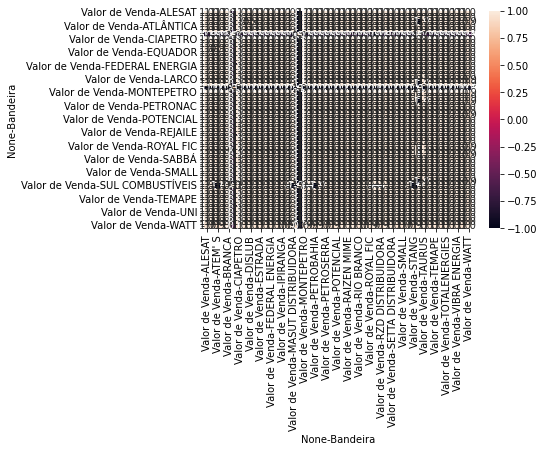

In [70]:
# matriz4 = sns.heatmap(correlacao4, annot = True, fmt=".1f")

In [72]:
fig = px.scatter(correlacao4, opacity=0.5, log_x = True, width = 800)

TypeError: ignored